<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/regress%C3%A3o_linear_m%C3%BAltipla_com_sklearn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#SETUP
import  pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [14]:
df = pd.read_excel("/content/Cópia de Limite_Credito_Dummy.xlsx")

In [15]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Idade                    48 non-null     int64 
 1   RendimentoTotal          48 non-null     int64 
 2   Salario                  48 non-null     int64 
 3   LimitedeCreditoImediato  48 non-null     int64 
 4   Escolaridade             48 non-null     object
 5   Gênero                   48 non-null     object
 6   Região                   48 non-null     object
 7   LimitedoChequeEspecial   48 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ KB


In [36]:
#Tranformando os dados em 0 e 1 nas colunas categoricas
le =  LabelEncoder()
le.fit(df.Escolaridade)
df.Escolaridade = le.transform(df.Escolaridade)

le.fit(df.Gênero)
df.Gênero = le.transform(df.Gênero)

le.fit(df.Região)
df.Região = le.transform(df.Região)



In [28]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

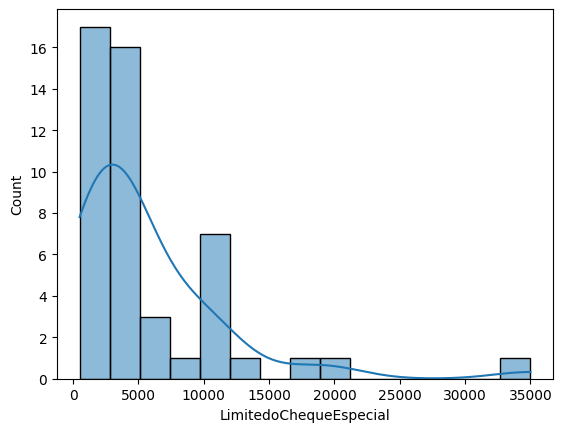

In [60]:
#Verificando  de distribuição normal da coluna de limite de cheque especial
sns.histplot(df, x ="LimitedoChequeEspecial",kde=True)

<Axes: xlabel='Idade', ylabel='Count'>

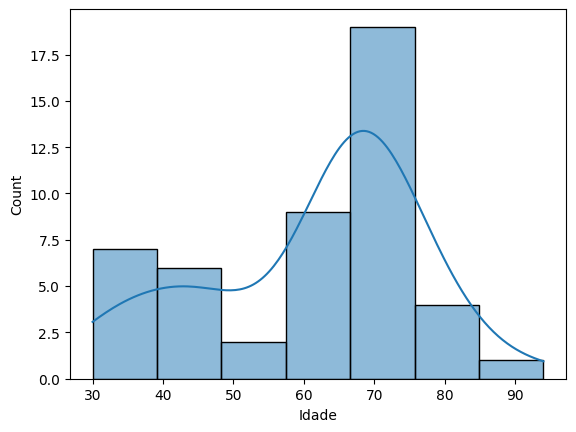

In [61]:
#agora a distribuição por idade
sns.histplot(df, x ="Idade",kde=True)

<Axes: xlabel='Salario', ylabel='Count'>

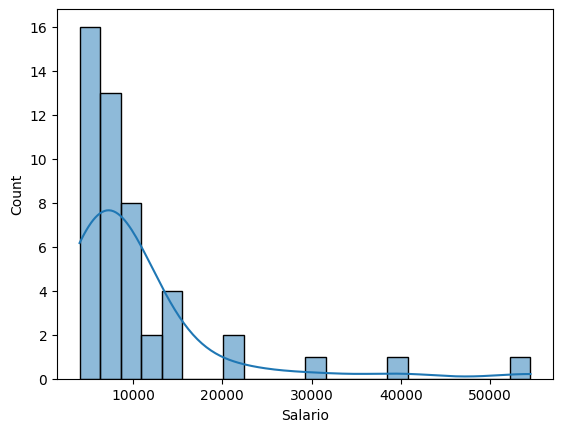

In [63]:
#com salario
sns.histplot(df, x ="Salario",kde=True)

In [64]:
#verificando a correlação
df.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
Idade,1.000000,0.239445,0.213186,0.057183,0.150088,0.196052,0.121217,0.228117
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.396191,0.177798,0.406241,0.858120
Salario,0.213186,0.960551,1.000000,0.081792,0.475479,0.242621,0.424335,0.888839
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.259433,0.001145,0.473326,0.226990
Escolaridade,0.150088,0.396191,0.475479,0.259433,1.000000,0.237508,0.602464,0.598310
Gênero,0.196052,0.177798,0.242621,0.001145,0.237508,1.000000,-0.167248,0.312566
Região,0.121217,0.406241,0.424335,0.473326,0.602464,-0.167248,1.000000,0.591779
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,0.598310,0.312566,0.591779,1.000000


<Axes: >

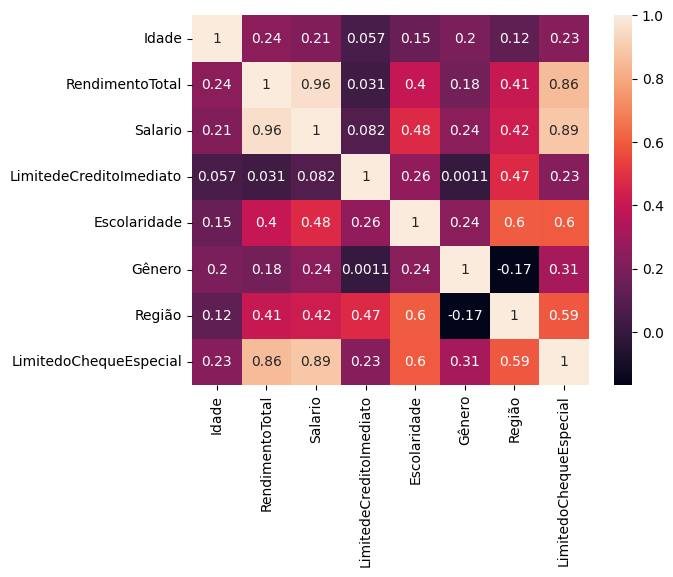

In [65]:
#verificando a correlação pelo heatmap
sns.heatmap(df.corr(),annot=True)

In [66]:
#mudando a escala dos dados para deixar as variaveis entre 0  e 1 e agrupando em um novo dataframe chamado de df_norm

scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df),index = df.index, columns = df.columns)

In [67]:
df_norm .describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [69]:
#aqui eu so queria os nomes do df pra ajustar na function
df.columns

Index(['Idade', 'RendimentoTotal', 'Salario', 'LimitedeCreditoImediato',
       'Escolaridade', 'Gênero', 'Região', 'LimitedoChequeEspecial'],
      dtype='object')

In [70]:
#definindo a function que serve para retirar um sumario ols e verifcar as metricas de R2 , R2 ao quadrado , P - Value(p valor) , coenficiente , residuos de erros e etc
function = "LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região"

In [72]:
#OLS REGRESSION
model = smf.ols(formula = function, data = df_norm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Sat, 15 Jun 2024   Prob (F-statistic):           7.44e-17
Time:                            21:45:47   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [80]:
#Usei a tecnica de backward para retirar todas as variaveis que influencia o p valor de forma negativa e também retirei o intercept para melhor os meu r2 e r2 ao quadrado e tbm melhorar os valores P
function = "LimitedoChequeEspecial~Salario+Gênero+Região-1"

In [81]:
model = smf.ols(formula = function, data = df_norm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Sat, 15 Jun 2024   Prob (F-statistic):                    2.56e-25
Time:                            21:49:00   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## De Acordo com o R2 E R2 AO QUADRADO meus dados  tem 92%  de chance de apresentar uma target ajustada .

In [82]:
x = df_norm[["Salario","Gênero","Região"]]
y = df_norm["LimitedoChequeEspecial"]

In [83]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.871127025731754


In [85]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.04072145318984293
MSE: 0.003554155058173055
RMSE: 0.059616734715791465


In [86]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.05676449812940604
MSE: 0.005628472014227284
RMSE: 0.07502314319080003


estas metricas mede que nosso modelo se adaptou bem a base de dados e conseque prever bem.


<Axes: xlabel='LimitedoChequeEspecial'>

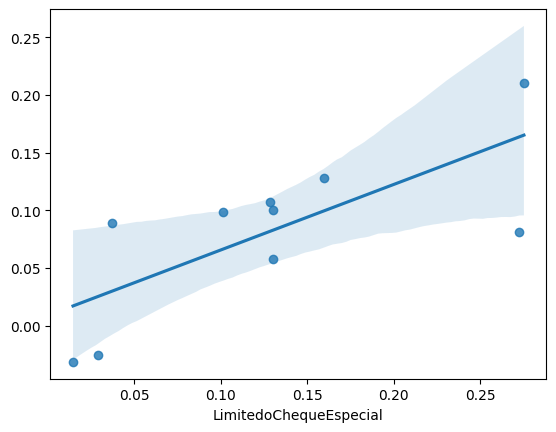

In [87]:
sns.regplot(x=y_test, y=y_pred)